<a href="https://colab.research.google.com/github/taukirazam16/PyTorch-Practice/blob/main/Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Summary
MNIST<br>
Data Loader, Transformation <br>
Multilayer NN, Activation Function <br>
Loss and Optimizer <br>
Training Loop (Batch Training)<br>
Model Evaluation <br>



In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#hyper parameter
input_size = 784 #because input image = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,),(0.3081,))])

In [6]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transform,download=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
train_loader

In [ ]:
print(len(train_loader))

600


In [8]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)
print(len(test_loader))

100


In [9]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


# Neural Net

In [10]:
class NeuralNet(nn.Module):
  def __init__(self, input_size,hidden_size,num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out



In [11]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [12]:
#Loss and Optimizer

criterion = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
n_total_steps = len(train_loader)
n_total_steps

600

In [14]:
#training loop
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    Optimizer.zero_grad()
    loss.backward()
    Optimizer.step()

    if (i+1) % 100 ==0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.4341
Epoch [1/2], Step [200/600], Loss: 0.2618
Epoch [1/2], Step [300/600], Loss: 0.2525
Epoch [1/2], Step [400/600], Loss: 0.3249
Epoch [1/2], Step [500/600], Loss: 0.1827
Epoch [1/2], Step [600/600], Loss: 0.0848
Epoch [2/2], Step [100/600], Loss: 0.2366
Epoch [2/2], Step [200/600], Loss: 0.0837
Epoch [2/2], Step [300/600], Loss: 0.1534
Epoch [2/2], Step [400/600], Loss: 0.0646
Epoch [2/2], Step [500/600], Loss: 0.0447
Epoch [2/2], Step [600/600], Loss: 0.2093


In [15]:
#test
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  for images, labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    #print(images.shape)
    labels = labels.to(device)
    outputs = model(images)

    #value, index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * n_correct / n_samples
  print("Accuracy: ", acc)


Accuracy:  96.55


#Testing Manually

In [19]:
from PIL import Image

In [16]:
def transform_image(photo):
    transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((28,28)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.1307,),(0.3081,))])

    img = Image.open(photo)
    return transform(img).unsqueeze(0)

# predict
def get_prediction(image_tensor):
    images = image_tensor.reshape(-1, 28*28)
    outputs = model(images)
        # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    return predicted

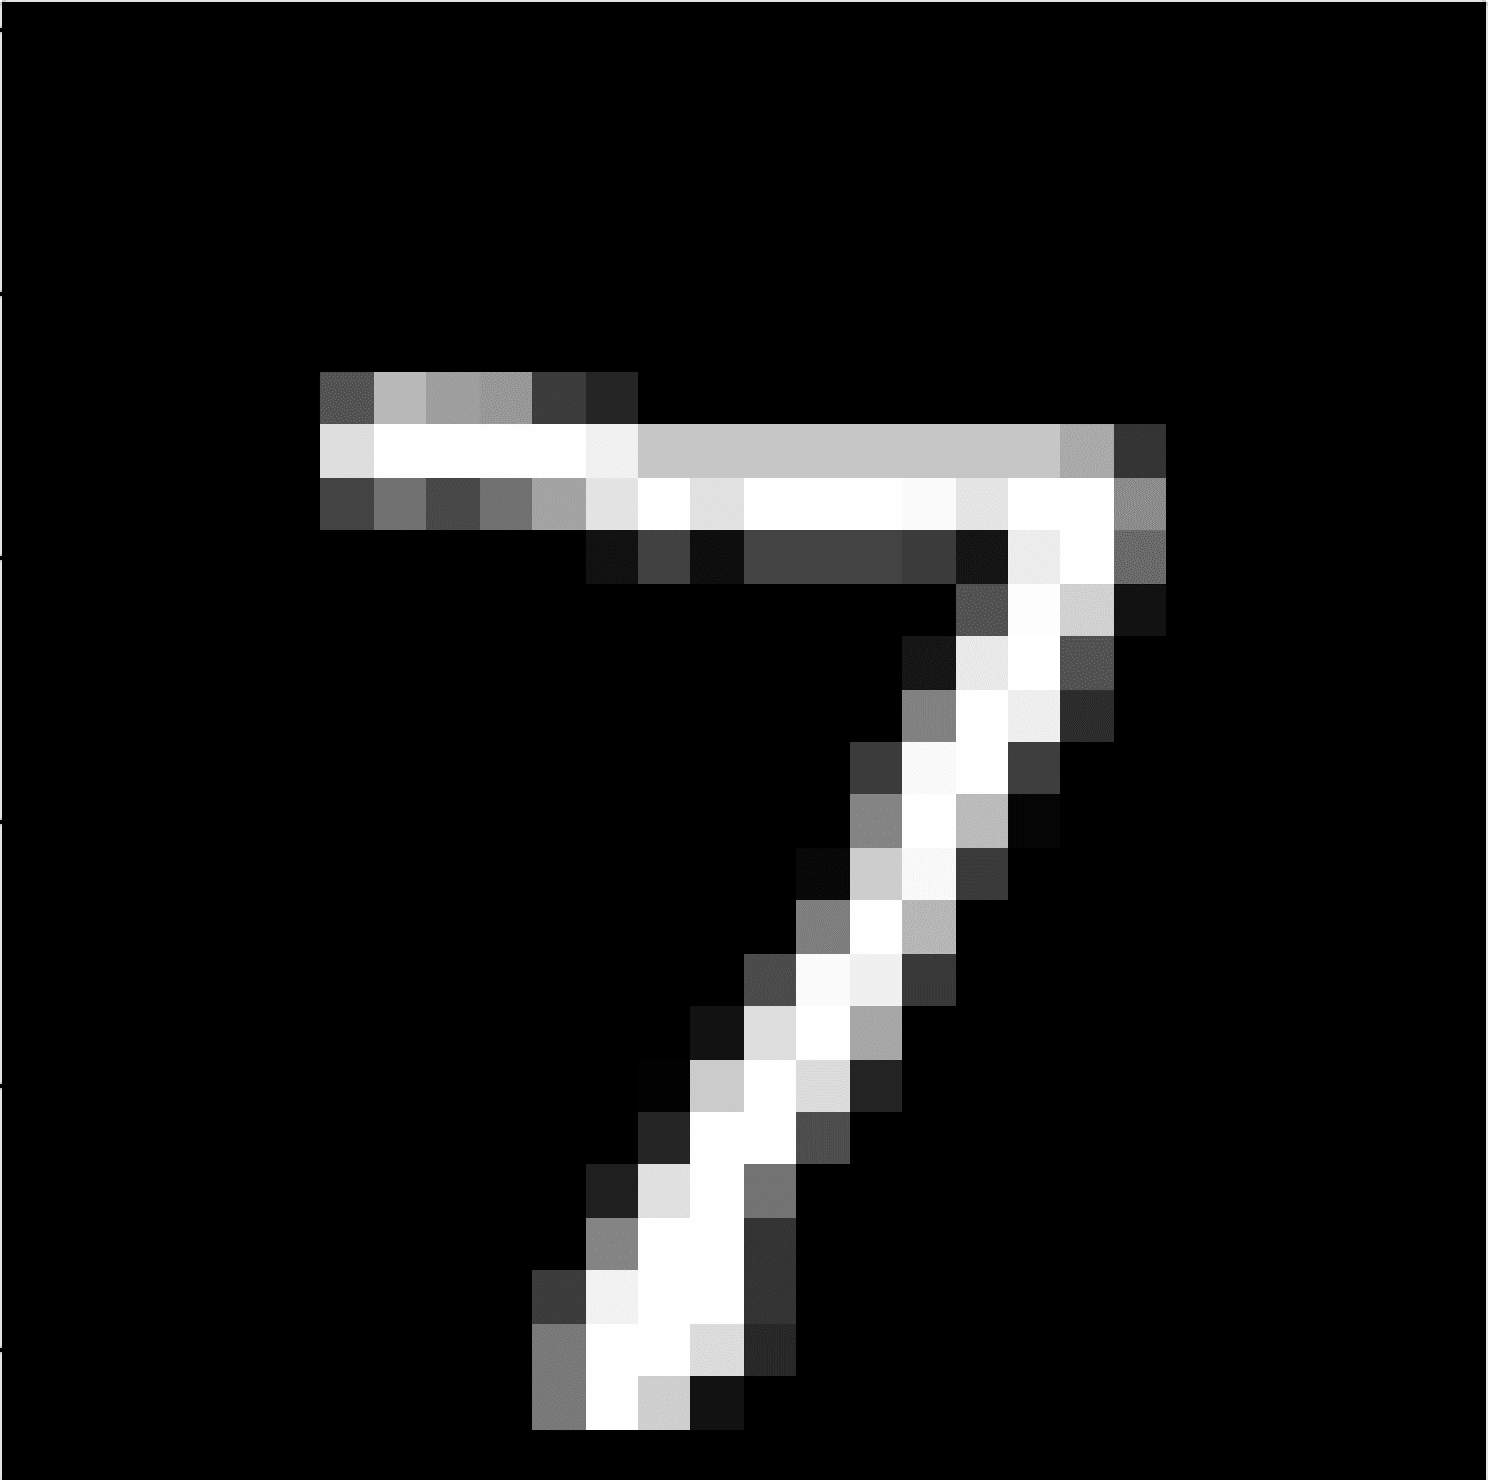

In [23]:
image1 = Image.open("seven.png")
image1

In [27]:
pred = get_prediction(transform_image("seven.png"))
pred

tensor([7])

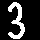

In [28]:
image2 = Image.open("three.PNG")
image2

In [29]:
pred = get_prediction(transform_image("three.PNG"))
pred

tensor([3])